In [5]:
v25v5=[2.25 , 27.26, 33.78 , 53.44, 80.33, 120.47]
v25v10=[8.30 , 23.61 , 40.30 , 61.78 , 90.97 ,136.74 ]
v25v15=[ 11.56 , 29.88 , 54.25 , 87.96 , 144.63]

v30v5=[ 6.02 , 19.01 , 36.64 , 59.28 , 97.02]
v30v10=[3.72 , 19.00 , 36.20 , 58.78 , 94.07 ]
v30v15=[2.43 , 19.55 , 38.39 , 63.51 , 102.95  ]

v35v5=[6.60 , 24.91 , 44.48 , 73.60 , 116.27 ]
v35v10=[2.88 , 18.52 , 38.25 , 64.94 , 100.46 ]
v35v15=[2.72 , 20.26 , 41.22 , 72.66 , 116.45 ]

v40v5=[ 1.60 , 16.41 ,  36.11, 62.11 , 101.83]
v40v10=[ 4.97 , 21.08 , 42.99 , 69.65 , 108.35]
v40v15=[2.20 , 17.85  , 38.44 , 62.49 , 99.68 ]

v45v5=[9.87, 25.20 ,44.01 , 68.78 , 102.57]
v45v10=[ 7.69 , 23.84 , 43.34 , 67.32, 104.76 ]
v45v15=[1.01 , 15.22 , 30.51 , 52.53 , 81.77]

v50v5=[ 6.73 , 24.48 , 45.10 , 71.98 , 116.05]
v50v10=[ 3.75 , 19.23 , 36.51 , 58.45 , 89.36]
v50v15=[14.49 , 34.86 , 59.53 , 96.50 , 155.22 ]


Time interval between decays [17.75 20.62 26.88 44.07]
Average time of each pair of decays [15.6  34.79 58.54 94.02]
Beta: [0.01206332 2.63271418]
Beta Std Error: [0.00085641 0.05854103]
Beta Covariance: [[ 1.82109587e-06 -1.11778175e-04]
 [-1.11778175e-04  8.50930987e-03]]
Residual Variance: 0.4027415002748963
Inverse Condition #: 0.059956744900682764
Reason(s) for Halting:
  Sum of squares convergence


<IPython.core.display.Javascript object>


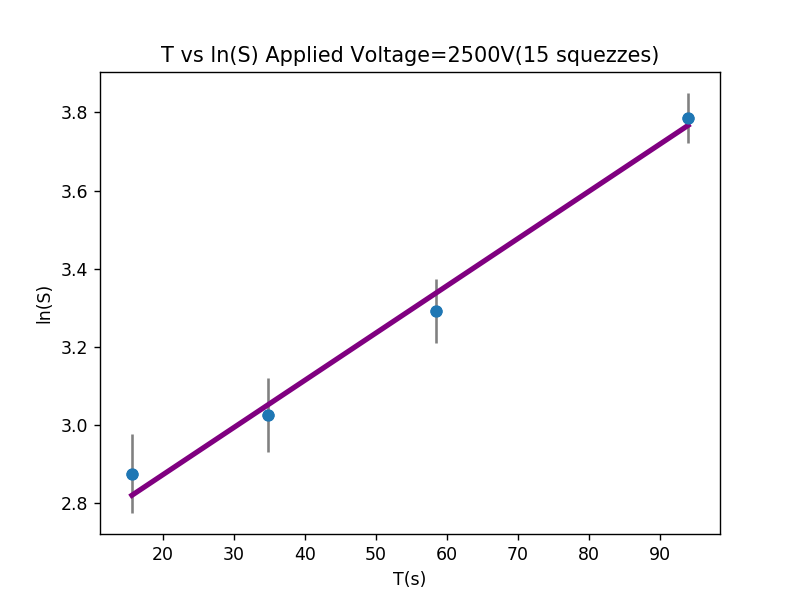

In [6]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.odr.odrpack as odrpack

a=np.array(v50v5)

s=[]

for i in range(len(a)-1):
    s.append(a[i+1]-a[i])
    
S=np.array(np.round(s,2))
lnS=np.log(S)

t=[]

for i in range (len(a)-1):
    t.append((a[i]+a[i+1])/2)

T=np.round(t,2)


print('Time interval between decays',S)
print('Average time of each pair of decays',T)


serr=np.sqrt(0.18/S)
terr=np.sqrt(0.045)

def f(p,x):
    B,c=p
   
    return B*x+c


linear = odrpack.Model(f)


# mydata = odrpack.Data(x, y, wd=1./np.power(sx,2), we=1./np.power(sy,2))
mydata = odrpack.RealData(T, lnS, sx=terr, sy=serr)

myodr = odrpack.ODR(mydata, linear, beta0=[0.,1.])

myoutput = myodr.run()

myoutput.pprint()


x_fit = np.linspace(T[0], T[-1], 1000)


y_fit = f(myoutput.beta, x_fit)

plt.plot(x_fit,y_fit, label='ODR', lw=3, color='purple')

plt.scatter(T,lnS)

plt.errorbar(T,lnS,xerr=terr,yerr=serr,fmt='o',ecolor='grey')

plt.title('T vs ln(S) Applied Voltage=2500V(15 squezzes)')
plt.xlabel('T(s)')
plt.ylabel('ln(S)')
plt.show()

#plt.savefig('v25v15')

[0.01164036 0.01452943 0.01121953 0.01252556 0.0117018  0.01107147]
[0.00018688 0.00051345 0.00052291 0.00036124 0.0003062  0.0003748 ]
Beta: [-1.15936611e-07  1.22446952e-02]
Beta Std Error: [4.03726002e-07 1.43392050e-03]
Beta Covariance: [[ 1.75014791e-14 -5.98230573e-11]
 [-5.98230573e-11  2.20775796e-07]]
Residual Variance: 9.31319483192843
Inverse Condition #: 0.0007633197001293207
Reason(s) for Halting:
  Sum of squares convergence


<IPython.core.display.Javascript object>


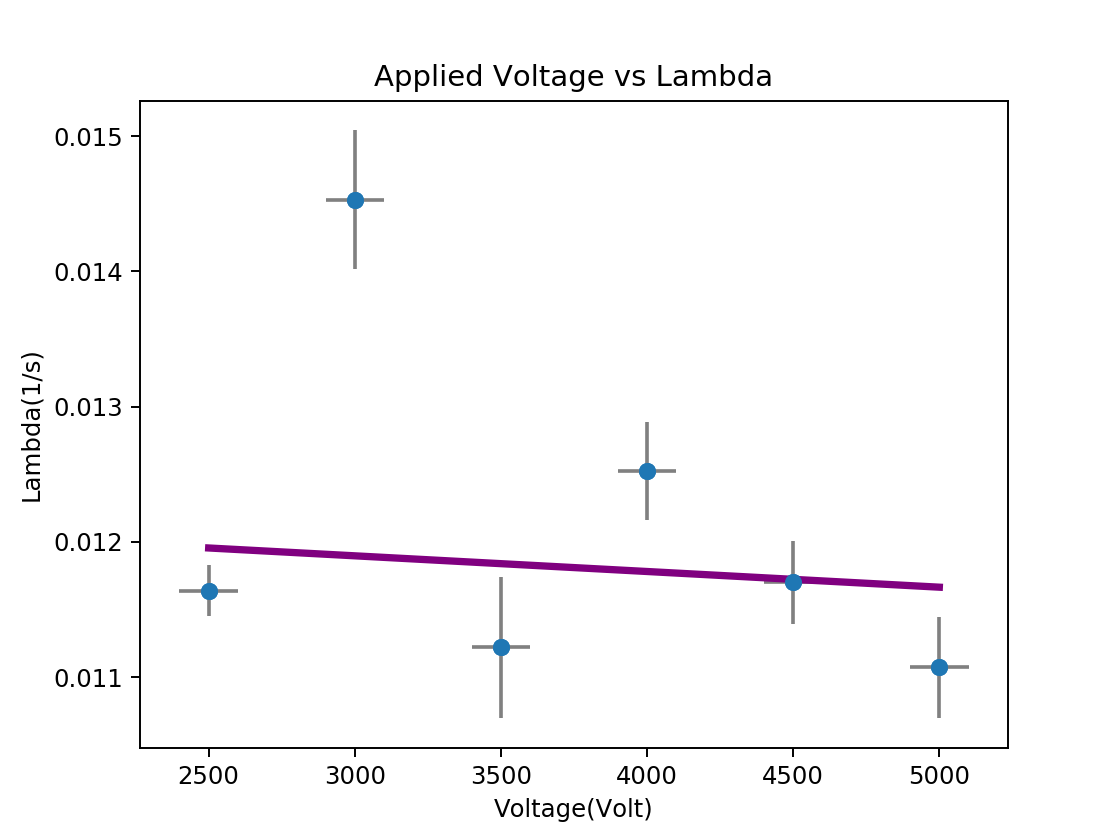

In [93]:
#This part is calculated but not used in the report of the experiment
#Because it is not required.(From the procedure)

import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.odr.odrpack as odrpack

#slopes and sigmas for 2500V
slope25=np.array([0.00859974,0.01169593,0.01163122])
sigma25=np.array([0.00559193,0.00042479,0.00020825])

#slopes and sigmas for 3000V
slope30=np.array([0.01586273,0.01349892,0.01224429])
sigma30=np.array([0.00069167,0.00106578,0.00110258])

#slopes and sigmas for 3500V
slope35=np.array([0.01139314,0.01119154,0.01113571])
sigma35=np.array([0.00111362,0.00075111,0.00096304])

#slopes and sigmas for 4000V
slope40=np.array([0.01316155,0.01097054,0.01183325])
sigma40=np.array([0.00044489,0.00078338,0.00100951])

#slopes and sigmas for 4500V
slope45=np.array([0.01155652,0.01214483,0.01297676])
sigma45=np.array([0.00033811,0.00084166,0.00140551])

#slopes and sigmas for 5000V
slope50=np.array([0.01206332,0.01153819,0.01061395])
sigma50=np.array([0.00085641,0.00084949,0.0004784])

Lambdas=np.empty(6)
#calculating weighted averages of lambda values and listing it
Lambdas[0]=np.sum(slope25/(sigma25**2))/np.sum(1/(sigma25**2))

Lambdas[1]=np.sum(slope30/(sigma30**2))/np.sum(1/(sigma30**2))

Lambdas[2]=np.sum(slope35/(sigma35**2))/np.sum(1/(sigma35**2))

Lambdas[3]=np.sum(slope40/(sigma40**2))/np.sum(1/(sigma40**2))

Lambdas[4]=np.sum(slope45/(sigma45**2))/np.sum(1/(sigma45**2))

Lambdas[5]=np.sum(slope50/(sigma50**2))/np.sum(1/(sigma50**2))

lerr=np.empty(6)

lerr[0]=np.sqrt(1/np.sum(1/sigma25**2))

lerr[1]=np.sqrt(1/np.sum(1/sigma30**2))

lerr[2]=np.sqrt(1/np.sum(1/sigma35**2))

lerr[3]=np.sqrt(1/np.sum(1/sigma40**2))

lerr[4]=np.sqrt(1/np.sum(1/sigma45**2))

lerr[5]=np.sqrt(1/np.sum(1/sigma50**2))

print(Lambdas)
print(lerr)

Voltages=[2500,3000,3500,4000,4500,5000]
verr=100

def f(p,x):
    B,c=p
   
    return B*x+c


linear = odrpack.Model(f)


# mydata = odrpack.Data(x, y, wd=1./np.power(sx,2), we=1./np.power(sy,2))
mydata = odrpack.RealData(Voltages,Lambdas , sx=verr, sy=lerr)

myodr = odrpack.ODR(mydata, linear, beta0=[0.,1.])

myoutput = myodr.run()

myoutput.pprint()


x_fit = np.linspace(Voltages[0], Voltages[-1], 1000)


y_fit = f(myoutput.beta, x_fit)

plt.plot(x_fit,y_fit, label='ODR', lw=3, color='purple')

plt.scatter(Voltages,Lambdas)

plt.errorbar(Voltages,Lambdas,xerr=verr,yerr=lerr,fmt='o',ecolor='grey')

plt.title('Applied Voltage vs Lambda')
plt.xlabel('Voltage(Volt)')
plt.ylabel('Lambda(1/s)')
plt.show()



In [12]:
import numpy as np



#slopes from the all fitted for different voltages and squeezes
slope=np.array([0.00859974,0.01169593,0.01163122,0.01586273,0.01349892
                ,0.01224429,0.01139314,0.01119154,0.01113571,0.01316155,0.01097054
                ,0.01183325,0.01155652,0.01214483,0.01297676,0.01206332,0.01153819,0.01061395])

sigma=np.array([0.00559193,0.00042479,0.00020825,0.00069167,0.00106578
                ,0.00110258,0.00111362,0.00075111,0.00096304,0.00044489,0.00078338,0.00100951
                ,0.00033811,0.00084166,0.00140551,0.00085641,0.00084949,0.0004784])

#taking weighted averages for decay constants and their standard deviations
Lambda=np.sum(slope/(sigma**2))/np.sum(1/(sigma**2))



s_weighted=np.sqrt(1/np.sum(1/sigma**2))

#calculating half life and its uncertainty
T=np.log(2)/Lambda


sigma_T=((np.log(2))*s_weighted)/(Lambda**2)

print('Half Life',T)
print('Standard Deviation of Half Life',sigma_T)


print('Decay Constant',Lambda)
print('Uncertainty of Decay Constant',s_weighted)
err=abs(55.6-58.5)/0.629

print('Sigma of Experimental Result',err)


Half Life 58.500672465249906
Standard Deviation of Half Life 0.6294398943062631
Decay Constant 0.01184853355269861
Sigma of Decay Constant 0.00012748468338590348
Sigma of Experimental Result 4.610492845786961
